# Introduction

Do higher film budgets lead to more box office revenue? Let's find out if there's a relationship using the movie budgets and financial performance data that I've scraped from [the-numbers.com](https://www.the-numbers.com/movie/budgets) on **May 1st, 2018**. 

<img src=https://i.imgur.com/kq7hrEh.png>

# Import Statements

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Notebook Presentation

In [64]:
pd.options.display.float_format = '{:,.2f}'.format

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Read the Data

In [10]:
data = pd.read_csv('cost_revenue_dirty.csv')
data.head()

Rank Release_Date                     Movie_Title USD_Production_Budget  \
0  5293     8/2/1915           The Birth of a Nation              $110,000   
1  5140     5/9/1916                     Intolerance              $385,907   
2  5230   12/24/1916    20,000 Leagues Under the Sea              $200,000   
3  5299    9/17/1920  Over the Hill to the Poorhouse              $100,000   
4  5222     1/1/1925                  The Big Parade              $245,000   

  USD_Worldwide_Gross USD_Domestic_Gross  
0         $11,000,000        $10,000,000  
1                  $0                 $0  
2          $8,000,000         $8,000,000  
3          $3,000,000         $3,000,000  
4         $22,000,000        $11,000,000

# Explore and Clean the Data

**Challenge**: Answer these questions about the dataset:
1. How many rows and columns does the dataset contain?
2. Are there any NaN values present?
3. Are there any duplicate rows?
4. What are the data types of the columns?

In [9]:
print(f"The dataset has {data.shape[0]} rows and {data.shape[1]} columns.")
print(f"NaN values: {data.isna().values.any()}")
print(f"Duplicated values: {data.duplicated().values.any()}")
data.info()

The dataset has 5391 rows and 6 columns.
NaN values: False
Duplicated values: False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


### Data Type Conversions

**Challenge**: Convert the `USD_Production_Budget`, `USD_Worldwide_Gross`, and `USD_Domestic_Gross` columns to a numeric format by removing `$` signs and `,`. 
<br>
<br>
Note that *domestic* in this context refers to the United States.

In [18]:
chars_to_remove = ["$", ","]
columns_to_clean = ["USD_Production_Budget", "USD_Worldwide_Gross", "USD_Domestic_Gross"]
for column in columns_to_clean:
    # Replace each character with string
    for char in chars_to_remove:
        data[column] = data[column].astype(str).str.replace(char, "")
    # Convert each entry to numeric
    data[column] = pd.to_numeric(data[column])
data.head()

Rank Release_Date                     Movie_Title  USD_Production_Budget  \
0  5293     8/2/1915           The Birth of a Nation                 110000   
1  5140     5/9/1916                     Intolerance                 385907   
2  5230   12/24/1916    20,000 Leagues Under the Sea                 200000   
3  5299    9/17/1920  Over the Hill to the Poorhouse                 100000   
4  5222     1/1/1925                  The Big Parade                 245000   

   USD_Worldwide_Gross  USD_Domestic_Gross  
0             11000000            10000000  
1                    0                   0  
2              8000000             8000000  
3              3000000             3000000  
4             22000000            11000000

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   int64 
 4   USD_Worldwide_Gross    5391 non-null   int64 
 5   USD_Domestic_Gross     5391 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 252.8+ KB


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


**Challenge**: Convert the `Release_Date` column to a Pandas Datetime type. 

In [20]:
data.Release_Date = pd.to_datetime(data.Release_Date)
data.Release_Date.head()

0   1915-08-02
1   1916-05-09
2   1916-12-24
3   1920-09-17
4   1925-01-01
Name: Release_Date, dtype: datetime64[ns]

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


### Descriptive Statistics

**Challenge**: 

1. What is the average production budget of the films in the data set?
2. What is the average worldwide gross revenue of films?
3. What were the minimums for worldwide and domestic revenue?
4. Are the bottom 25% of films actually profitable or do they lose money?
5. What are the highest production budget and highest worldwide gross revenue of any film?
6. How much revenue did the lowest and highest budget films make?

In [22]:
data.describe()

Rank  USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross
count 5,391.00               5,391.00             5,391.00            5,391.00
mean  2,696.00          31,113,737.58        88,855,421.96       41,235,519.44
std   1,556.39          40,523,796.88       168,457,757.00       66,029,346.27
min       1.00               1,100.00                 0.00                0.00
25%   1,348.50           5,000,000.00         3,865,206.00        1,330,901.50
50%   2,696.00          17,000,000.00        27,450,453.00       17,192,205.00
75%   4,043.50          40,000,000.00        96,454,455.00       52,343,687.00
max   5,391.00         425,000,000.00     2,783,918,982.00      936,662,225.00

In [26]:
data.loc[data.USD_Production_Budget.idxmin]

Rank                                    5391
Release_Date             2005-05-08 00:00:00
Movie_Title                My Date With Drew
USD_Production_Budget                   1100
USD_Worldwide_Gross                   181041
USD_Domestic_Gross                    181041
Name: 2427, dtype: object

In [27]:
data.loc[data.USD_Production_Budget.idxmax]

Rank                                       1
Release_Date             2009-12-18 00:00:00
Movie_Title                           Avatar
USD_Production_Budget              425000000
USD_Worldwide_Gross               2783918982
USD_Domestic_Gross                 760507625
Name: 3529, dtype: object

# Investigating the Zero Revenue Films

**Challenge** How many films grossed $0 domestically (i.e., in the United States)? What were the highest budget films that grossed nothing?

In [44]:
zero_domestic = data[data.USD_Domestic_Gross == 0]
print(f"{len(zero_domestic)} films grossed $0 domestically.")

512 films grossed $0 domestically.


In [45]:
zero_domestic.sort_values("USD_Production_Budget", ascending=False).head(10)

Rank Release_Date                                   Movie_Title  \
5388    96   2020-12-31                                   Singularity   
5387   126   2018-12-18                                       Aquaman   
5384   321   2018-09-03                             A Wrinkle in Time   
5385   366   2018-10-08                                Amusement Park   
5090   556   2015-12-31            Don Gato, el inicio de la pandilla   
4294   566   2012-12-31  Astérix et Obélix: Au service de Sa Majesté    
5058   880   2015-11-12                              The Ridiculous 6   
5338   879   2017-04-08                                The Dark Tower   
5389  1119   2020-12-31                        Hannibal the Conqueror   
4295  1230   2012-12-31                                    Foodfight!   

      USD_Production_Budget  USD_Worldwide_Gross  USD_Domestic_Gross  
5388              175000000                    0                   0  
5387              160000000                    0                   0  
5384              103000000                    0                   0  
5385              100000000                    0                   0  
5090               80000000              4547660                   0  
4294               77600000             60680125                   0  
5058               60000000                    0                   0  
5338               60000000                    0                   0  
5389               50000000                    0                   0  
4295               45000000                73706                   0

**Challenge**: How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally?

In [41]:
zero_worldwide = data[data.USD_Worldwide_Gross == 0]
print(f"{len(zero_worldwide)} films had grossed $0 worldwide.")

357 films had grossed $0 worldwide.


In [43]:
zero_worldwide.sort_values("USD_Production_Budget", ascending=False).head(10)

Rank Release_Date             Movie_Title  USD_Production_Budget  \
5388    96   2020-12-31             Singularity              175000000   
5387   126   2018-12-18                 Aquaman              160000000   
5384   321   2018-09-03       A Wrinkle in Time              103000000   
5385   366   2018-10-08          Amusement Park              100000000   
5058   880   2015-11-12        The Ridiculous 6               60000000   
5338   879   2017-04-08          The Dark Tower               60000000   
5389  1119   2020-12-31  Hannibal the Conqueror               50000000   
5092  1435   2015-12-31                The Crow               40000000   
3300  1631   2008-12-31     Black Water Transit               35000000   
5045  1656   2015-10-30        Freaks of Nature               33000000   

      USD_Worldwide_Gross  USD_Domestic_Gross  
5388                    0                   0  
5387                    0                   0  
5384                    0                   0  
5385                    0                   0  
5058                    0                   0  
5338                    0                   0  
5389                    0                   0  
5092                    0                   0  
3300                    0                   0  
5045                    0                   0

### Filtering on Multiple Conditions

Here we look at a way of combining two conditions and obtaining a subset of our data that fulfills both of these conditions

In [48]:
international_releases = data.loc[
    (data.USD_Domestic_Gross == 0) &
    (data.USD_Worldwide_Gross != 0)
 ]

In [49]:
print(f"{len(international_releases)} films made revenue internationally but not in the Unites States.")
international_releases.head()

155 films made revenue internationally but not in the Unites States.


Rank Release_Date              Movie_Title  USD_Production_Budget  \
71    4310   1956-02-16                 Carousel                3380000   
1579  5087   2001-02-11  Everything Put Together                 500000   
1744  3695   2001-12-31                 The Hole                7500000   
2155  4236   2003-12-31                  Nothing                4000000   
2203  2513   2004-03-31                The Touch               20000000   

      USD_Worldwide_Gross  USD_Domestic_Gross  
71                   3220                   0  
1579                 7890                   0  
1744             10834406                   0  
2155                63180                   0  
2203              5918742                   0

**Challenge**: Use the [`.query()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to accomplish the same thing. Create a subset for international releases that had some worldwide gross revenue, but made zero revenue in the United States. 

Hint: This time you'll have to use the `and` keyword.

In [54]:
international_releases = data.query("USD_Domestic_Gross==0 and USD_Worldwide_Gross != 0")
print(f"Number of international releases: {len(international_releases)}")
international_releases.head()

Number of international releases: 155


Rank Release_Date              Movie_Title  USD_Production_Budget  \
71    4310   1956-02-16                 Carousel                3380000   
1579  5087   2001-02-11  Everything Put Together                 500000   
1744  3695   2001-12-31                 The Hole                7500000   
2155  4236   2003-12-31                  Nothing                4000000   
2203  2513   2004-03-31                The Touch               20000000   

      USD_Worldwide_Gross  USD_Domestic_Gross  
71                   3220                   0  
1579                 7890                   0  
1744             10834406                   0  
2155                63180                   0  
2203              5918742                   0

### Unreleased Films

**Challenge**:
* Identify which films were not released yet as of the time of data collection (May 1st, 2018).
* How many films are included in the dataset that have not yet had a chance to be screened in the box office? 
* Create another DataFrame called data_clean that does not include these films. 

In [56]:
# Date of Data Collection
scrape_date = pd.Timestamp('2018-5-1')

In [59]:
future_releases = data[data.Release_Date >= scrape_date]

In [60]:
data_clean = data.drop(future_releases.index)
data_clean.head()

Rank Release_Date                     Movie_Title  USD_Production_Budget  \
0  5293   1915-08-02           The Birth of a Nation                 110000   
1  5140   1916-05-09                     Intolerance                 385907   
2  5230   1916-12-24    20,000 Leagues Under the Sea                 200000   
3  5299   1920-09-17  Over the Hill to the Poorhouse                 100000   
4  5222   1925-01-01                  The Big Parade                 245000   

   USD_Worldwide_Gross  USD_Domestic_Gross  
0             11000000            10000000  
1                    0                   0  
2              8000000             8000000  
3              3000000             3000000  
4             22000000            11000000

In [61]:
data_clean.shape

(5384, 6)

### Films that Lost Money

**Challenge**: 
What is the percentage of films where the production costs exceeded the worldwide gross revenue? 

In [65]:
loss_releases = data_clean.query("USD_Production_Budget > USD_Worldwide_Gross")
print(f"{len(loss_releases)/len(data_clean) * 100}% films made losses.")

37.27711738484398% films made losses.


# Seaborn for Data Viz: Bubble Charts

[(0.0, 3000000000.0),
 Text(0, 0.5, 'Revenue in $ billions'),
 (0.0, 450000000.0),
 Text(0.5, 0, 'Budget in $100 millions')]

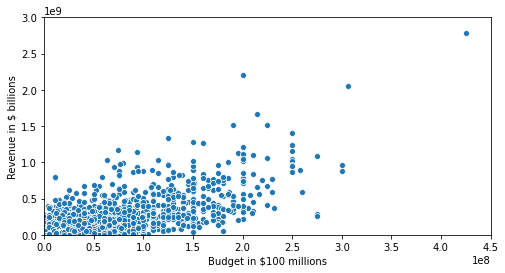

In [69]:
plt.figure(figsize=(8,4))
plot = sns.scatterplot(
    data=data_clean, 
    x="USD_Production_Budget",
    y="USD_Worldwide_Gross"
)
plot.set(
    xlim=(0, 450000000),
    ylim=(0, 3000000000),
    xlabel = "Budget in $100 millions",
    ylabel = "Revenue in $ billions"
)

### Plotting Movie Releases over Time

**Challenge**: Try to create the following Bubble Chart:

<img src=https://i.imgur.com/8fUn9T6.png>



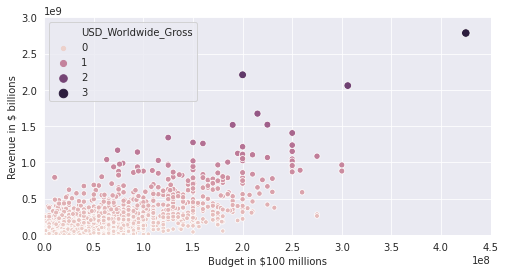

In [73]:
# set styling on a single chart
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(8,4))
    plot = sns.scatterplot(
        data=data_clean, 
        x="USD_Production_Budget",
        y="USD_Worldwide_Gross",
        hue="USD_Worldwide_Gross",
        size="USD_Worldwide_Gross"
    )
    plot.set(
        xlim=(0, 450000000),
        ylim=(0, 3000000000),
        xlabel = "Budget in $100 millions",
        ylabel = "Revenue in $ billions"
    )

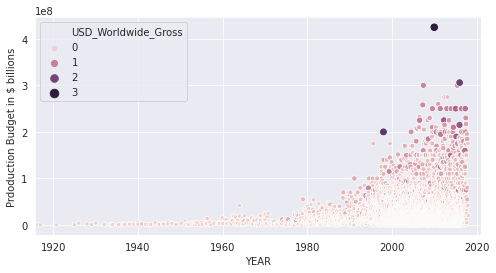

In [78]:
# set styling on a single chart
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(8,4))
    plot = sns.scatterplot(
        data=data_clean, 
        x="Release_Date",
        y="USD_Production_Budget",
        hue="USD_Worldwide_Gross",
        size="USD_Worldwide_Gross"
    )
    plot.set(
        xlim=(data.Release_Date.min() , data.Release_Date.max()),
        xlabel = "YEAR",
        ylabel = "Prdoduction Budget in $ billions"
    )

# Converting Years to Decades Trick

**Challenge**: Create a column in `data_clean` that has the decade of the release. 

<img src=https://i.imgur.com/0VEfagw.png width=650> 

Here's how: 
1. Create a [`DatetimeIndex` object](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) from the Release_Date column. 
2. Grab all the years from the `DatetimeIndex` object using the `.year` property.
<img src=https://i.imgur.com/5m06Ach.png width=650>
3. Use floor division `//` to convert the year data to the decades of the films.
4. Add the decades as a `Decade` column to the `data_clean` DataFrame.

In [79]:
data_clean["Decade"] = (pd.DatetimeIndex(data_clean.Release_Date).year//10)*10

In [80]:
data_clean.head()

Rank Release_Date                     Movie_Title  USD_Production_Budget  \
0  5293   1915-08-02           The Birth of a Nation                 110000   
1  5140   1916-05-09                     Intolerance                 385907   
2  5230   1916-12-24    20,000 Leagues Under the Sea                 200000   
3  5299   1920-09-17  Over the Hill to the Poorhouse                 100000   
4  5222   1925-01-01                  The Big Parade                 245000   

   USD_Worldwide_Gross  USD_Domestic_Gross  Decade  
0             11000000            10000000    1910  
1                    0                   0    1910  
2              8000000             8000000    1910  
3              3000000             3000000    1920  
4             22000000            11000000    1920

### Separate the "old" (before 1969) and "New" (1970s onwards) Films

**Challenge**: Create two new DataFrames: `old_films` and `new_films`
* `old_films` should include all the films before 1969 (up to and including 1969)
* `new_films` should include all the films from 1970 onwards
* How many films were released prior to 1970?
* What was the most expensive film made prior to 1970?

In [82]:
old_films = data_clean[data_clean.Decade <= 1969]
new_films = data_clean[data_clean.Decade > 1969]

In [86]:
print(f"{len(old_films)} were released prior to 1970")
print(f"The most expensive film prior to 1970 was {old_films.loc[old_films.USD_Production_Budget.idxmax]['Movie_Title']}")

153 were released prior to 1970
The most expensive film prior to 1970 was Cleopatra


# Seaborn Regression Plots

**Challenge**: Use Seaborn's `.regplot()` to show the scatter plot and linear regression line against the `new_films`. 
<br>
<br>
Style the chart

* Put the chart on a `'darkgrid'`.
* Set limits on the axes so that they don't show negative values.
* Label the axes on the plot "Revenue in \$ billions" and "Budget in \$ millions".
* Provide HEX colour codes for the plot and the regression line. Make the dots dark blue (#2f4b7c) and the line orange (#ff7c43).

Interpret the chart

* Do our data points for the new films align better or worse with the linear regression than for our older films?
* Roughly how much would a film with a budget of $150 million make according to the regression line?

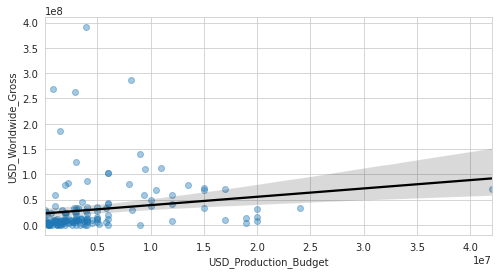

In [100]:
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(8,4))
    reg_plot = sns.regplot(
        data=old_films,
        x="USD_Production_Budget",
        y="USD_Worldwide_Gross",
        scatter_kws= {'alpha': 0.4},
        line_kws={'color': 'black'}
    )

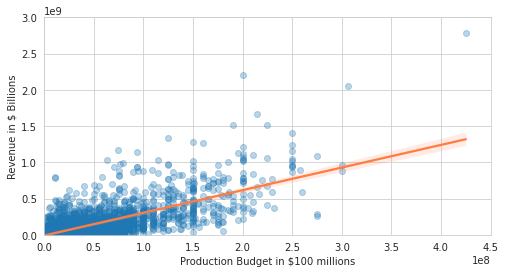

In [104]:
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(8,4))
    plot = reg_plot = sns.regplot(
        data=new_films,
        x="USD_Production_Budget",
        y="USD_Worldwide_Gross",
        scatter_kws= {'alpha': 0.3},
        line_kws={'color': '#ff7c43'}
    )
    plot.set(
        xlim=(0, 450000000),
        ylim=(0, 3000000000),
        xlabel="Production Budget in $100 millions",
        ylabel="Revenue in $ Billions"
    )

# Run Your Own Regression with scikit-learn

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**: Run a linear regression for the `old_films`. Calculate the intercept, slope and r-squared. How much of the variance in movie revenue does the linear model explain in this case?

In [109]:
linear_regression = LinearRegression()

In [107]:
X = pd.DataFrame(new_films, columns=["USD_Production_Budget"])
y = pd.DataFrame(new_films, columns=["USD_Worldwide_Gross"])

In [110]:
linear_regression.fit(X,y)

LinearRegression()

In [111]:
linear_regression.coef_

array([[3.12259592]])

In [112]:
linear_regression.intercept_

array([-8650768.00661026])

In [116]:
print(f"The equation for revenue is USD_Worldwide_Gross =  {linear_regression.intercept_[0]} + {linear_regression.coef_[0][0]}*USD_Production_Budget")

The equation for revenue is USD_Worldwide_Gross =  -8650768.00661026 + 3.1225959173210924*USD_Production_Budget


In [118]:
linear_regression.score(X, y)
print(f"Our linear regression model only explains {linear_regression.score(X, y) * 100}% of the variance in revenue.")

Our linear regression model only explains 55.77032617720403% of the variance in revenue.


In [120]:
X_old = pd.DataFrame(old_films, columns=["USD_Production_Budget"])
y_old = pd.DataFrame(old_films, columns=["USD_Worldwide_Gross"])

In [121]:
linear_regression_old = LinearRegression()
linear_regression_old.fit(X_old, y_old)

LinearRegression()

In [123]:
linear_regression_old.score(X_old, y_old)
print(f"Our linear regression model for films released before 1970 only explains {linear_regression_old.score(X_old, y_old) * 100}% of the variance in revenue.")

Our linear regression model for films released before 1970 only explains 2.937258620576877% of the variance in revenue.


# Use Your Model to Make a Prediction

We just estimated the slope and intercept! Remember that our Linear Model has the following form:

$$ REV \hat ENUE = \theta _0 + \theta _1 BUDGET$$

**Challenge**:  How much global revenue does our model estimate for a film with a budget of $350 million? 

In [124]:
budget = 350000000

In [137]:
revenue_estimate = linear_regression.intercept_[0] + linear_regression.coef_[0, 0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(f"The revenue estimate for a movie whose budget is $350 million is ${revenue_estimate/10**9} billion.")

The revenue estimate for a movie whose budget is $350 million is $1.084 billion.
